In [98]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
#Accuracy Functions

#Average Signed Distance
# Number of edges between two nodes
def Distance(graph,node_1,node_2,variants):
    shortest_path = nx.shortest_path(graph,node_1, node_2)
    
    return (len(shortest_path)) 

# Matrix of number of edges between two nodes in each graph structure

def Distances(graph1, graph2, variants):
    num_variants = len(variants)
    
    distances_1 = np.zeros((num_variants, num_variants))
    distances_2 = np.zeros((num_variants, num_variants))
    
    for i in range(num_variants):
        for j in range(i + 1, num_variants):
            dist1 = Distance(graph1, variants[i], variants[j],variants)
            distances_1[i][j] = dist1
            distances_1[j][i] = dist1  # Mirror to fill lower triangle
            
            dist2 = Distance(graph2, variants[i], variants[j],variants)
            distances_2[i][j] = dist2
            distances_2[j][i] = dist2  # Mirror to fill lower triangle
    return distances_1, distances_2

def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

#Distance matrix calculation
def calculate_distances(matrix):
    # Getting the shape of the matrix X
    rows, cols = matrix.shape
    # Initialize an empty list to store the results
    results = []
    # Loop through each row index i
    for i in range(rows):
        # Loop through each column index j where j is distinct from i
        for j in range(cols):
            if j != i:
                # Loop through each column index k where k is distinct from i and j
                for k in range(cols):
                    if k != j and k!=i:
                        # Calculate d[i, j] - d[i, k]
                        results.append(sign(matrix[i, j] - matrix[i, k]))
    return results

# Signed Distance
def Signed_Distance(graph1,graph2,variants):
    a,b=Distances(graph1,graph2,variants)
    a_distances = calculate_distances(a)
    b_distances = calculate_distances(b)
    triplets=[]
    for i in range(len(a_distances)):
        triplets.append(1-0.5*(abs(a_distances[i]-b_distances[i])))
    return 100*np.sum(triplets)/len(triplets)

In [99]:
from Bio import Phylo
import io
import igraph
import networkx as nx
from igraph import Graph
import matplotlib.pyplot as plt

def tabulate_names(tree):
    names = {}
    for idx, clade in enumerate(tree.find_clades()):
        if clade.name:
            clade.name = clade.name
        else:
            clade.name = str(idx)
        names[clade.name] = clade
    return names

# Function to traverse the tree and extract nodes and edges
def traverse_tree(tree, parent_node, graph):
    if isinstance(tree, Phylo.BaseTree.Clade):
        for clade in tree.clades:
            child_node = clade.name
            graph.add_edge(parent_node, child_node)
            traverse_tree(clade, child_node, graph)


In [212]:
# Define the Newick tree string
def tree(path):
    paup_output=open(path, encoding='utf-8' ).read()
    paup_output=paup_output.replace('[&R]','[&U]')
    paup_output=paup_output.split(r'[&U]')[1].split(';')[0].replace(' ','')
    
    # Parse Newick string to obtain a tree object
    tree = Phylo.read(io.StringIO(paup_output), 'newick')
    #tree.rooted = False
    tabulate_names(tree)
    G = nx.Graph()

    # Traverse the tree and add nodes and edges to the graph
    root_node = tree.root.name
    G.add_node(root_node)
    traverse_tree(tree.root, root_node, G)

    Phylo.draw(tree)
    plt.show()
    pos = nx.spring_layout(G)
   # plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True,font_size=15)
    return G


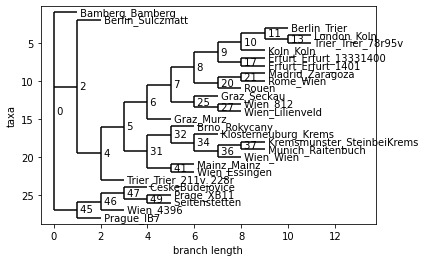

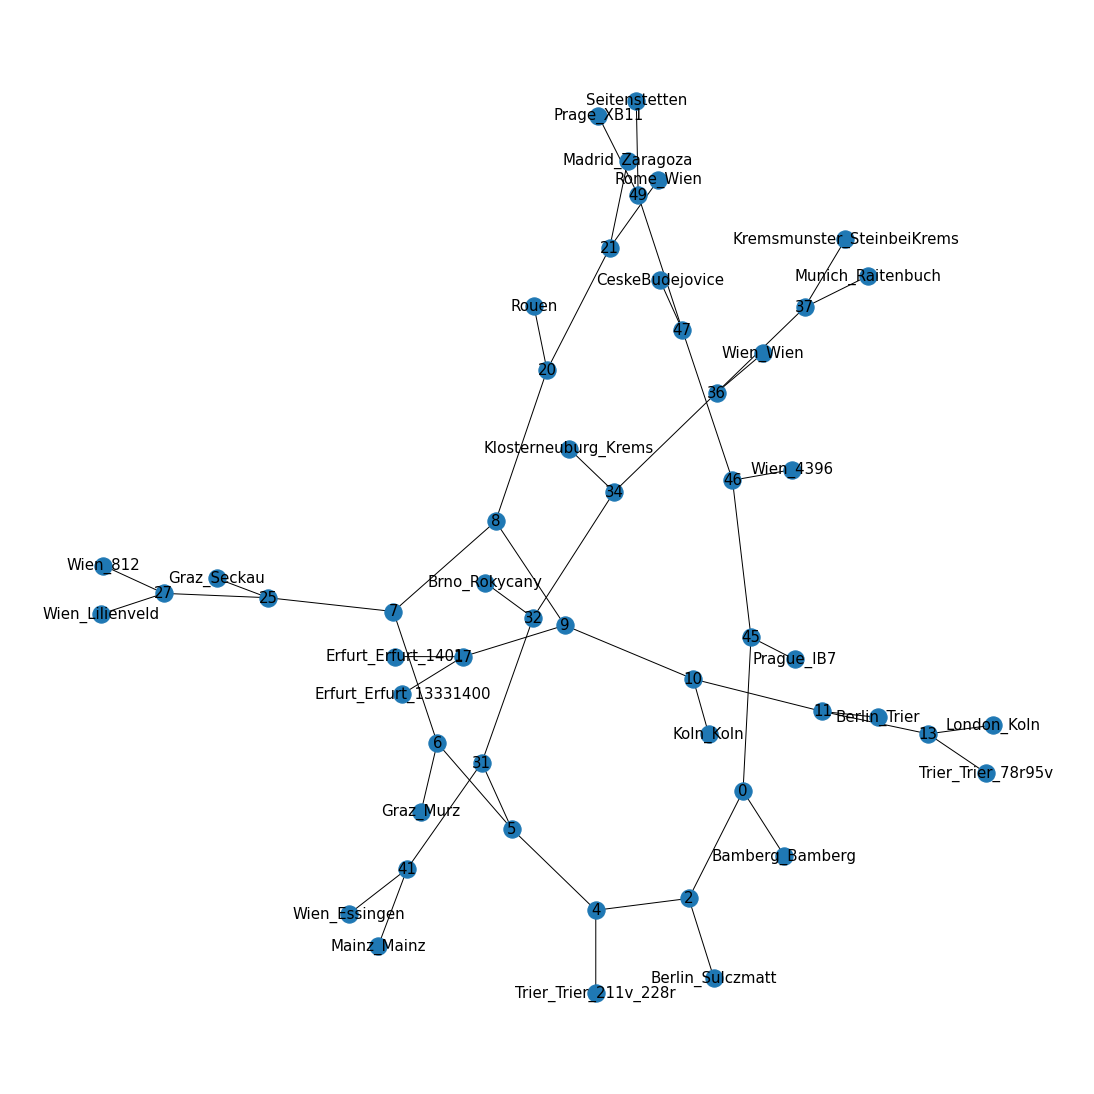

In [206]:
#To display simply plug in the location of your paup output file
tree(f"C:/Users/Darren Zammit/Desktop/Thesis/datasets/nexus/fidei28ls.out")

# Parzival

In [143]:
import networkx as nx
from os import listdir
from os.path import isfile, join
from os import walk
import json
import re

path="C:/Users/Darren Zammit/Desktop/Thesis/datasets/parzival"
witnesses = next(walk(path), (None, None, []))[2]
variants=[]
for i in witnesses:
    variants.append(i.replace('.txt',''))
variants
def positioning(graph):
    pos_dict = {}
    for i, node_list in enumerate(nx.topological_generations(graph)):
        x_offset = 0.0#len(node_list) / 2
        y_offset = 0.1
        for j, name in enumerate(node_list):
            pos_dict[name] = (j - x_offset, -i + j * y_offset)

    return pos_dict
import matplotlib.pyplot as plt
#create the correct parzival stemma for comparison
g = nx.Graph()
g.add_edges_from([('p17','p9'),('p17','p18'),('p17','p19'),('p19','p20'),('p9','p21'),('p21','p4'),('p21','p1'),('p9','p7'),('p7','p3'),('p20','p10'),('p20','p5'),('p19','p11'),('p19','p8'),('p8','p6'),('p8','p14'),('p18','p2'),('p18','p13'),('p18','p15'),('p18','p16'),('p13','p12')])


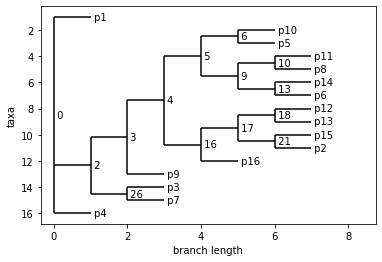

81.51785714285714

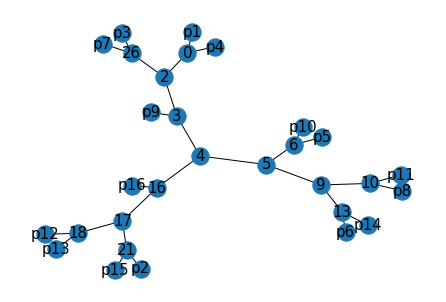

In [219]:
mp=tree(f"C:/Users/Darren Zammit/Desktop/Thesis/datasets/nexus/parzivalme.out")
#compute the average signed distance between the paup output and the correct stemma g
Signed_Distance(mp,g.to_undirected(),variants)

# Heinrichi

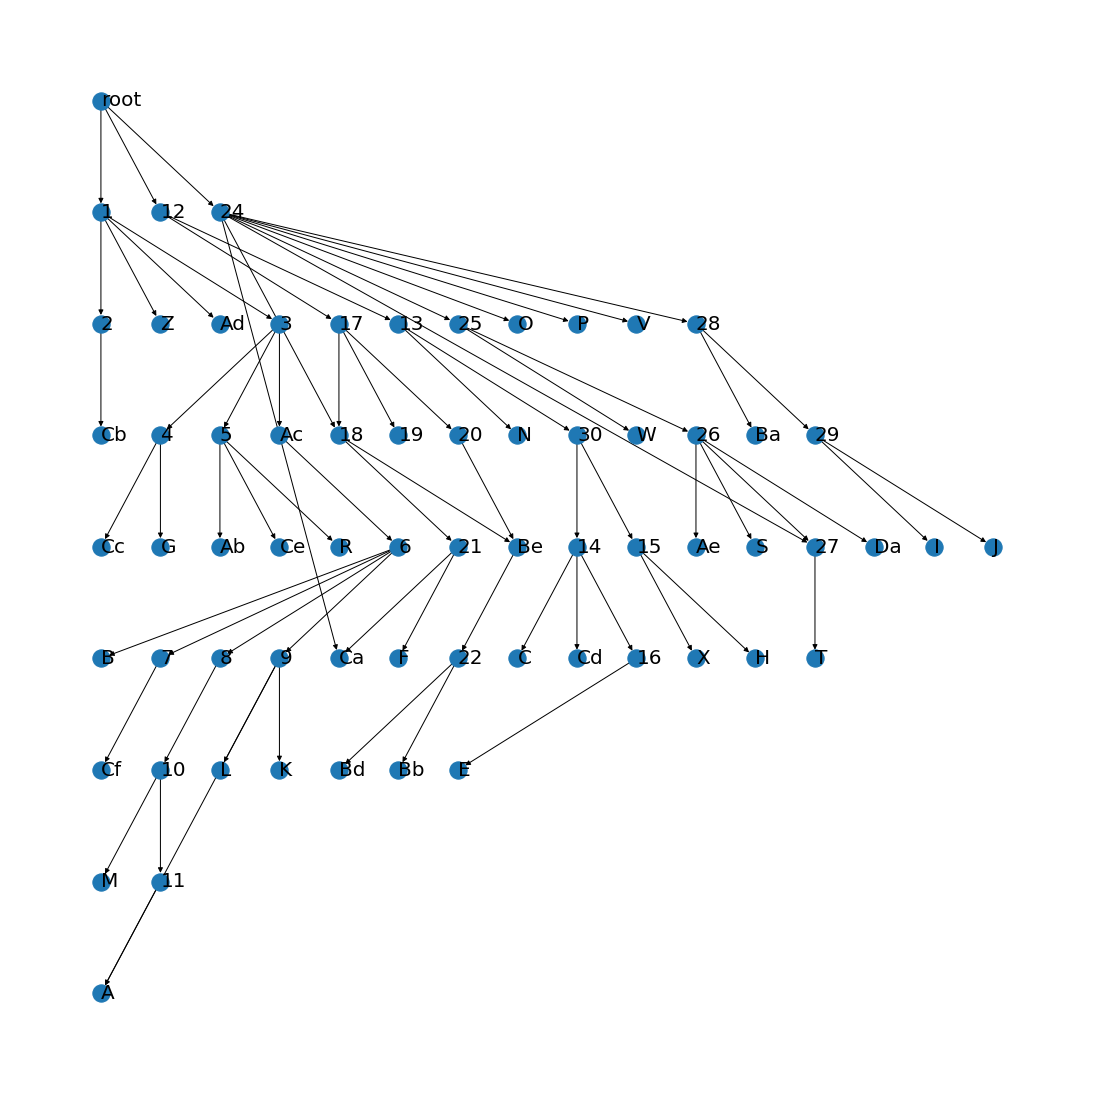

In [81]:
heinrichc = nx.DiGraph()

def positioning(graph):
    pos_dict = {}
    for i, node_list in enumerate(nx.topological_generations(graph)):
        x_offset = 0.0#len(node_list) / 2
        y_offset = 0.0
        for j, name in enumerate(node_list):
            pos_dict[name] = (j - x_offset, -i + j * y_offset)

    return pos_dict
#construct the correct heinrichi stemma
heinrichc.add_edges_from([('root','1'),('1','2'),('2','Cb'),
                  ('1','Z'),('1','Ad'),('1','3'),('3','4'),
                  ('3','5'),('3','Ac'),('4','Cc'),
                  ('4','G'),('5','Ab'),('5','Ce'),
                  ('5','R'),('Ac','6'),('6','B'),('6','7'),
                 ('6','8'),('6','9'),('7','Cf'),('8','10'),
                 ('9','L'),('9','K'),('10','M'),('10','11'),('11','A')])

heinrichc.add_edges_from([('root','12'),('root','12'),('12','17'),('12','13'),('13','N')
                  ,('15','X'),('15','H'),('13','30'),('30','14'),('14','C'),('14','Cd'),('14','16'),('30','15')
                  ,('16','E'),('17','18'),('17','19'),('17','20'),('18','21'),('21','Ca'),('21','F'),('18','Be'),('20','Be'),('Be','22'),('22','Bd'),('22','Bb')])
                
                
heinrichc.add_edges_from([('root','24'),('24','25'),('25','W'),('25','26')
                  ,('26','Ae'),('26','S'),('26','27'),('27','T')
                  ,('24','O'),('24','P'),('24','V'),('24','28')
                  ,('28','Ba'),('28','29'),('29','I'),('29','J')
                  ,('26','Da'),('9','A'),('24','18'),('24','Ca'),('24','27')])


#('9','A'),('24','18'),('24','Ca'),('24','27')

plt.figure(figsize=(15, 15))
pos=positioning(heinrichc)
nx.draw(heinrichc, pos)
nx.draw_networkx_labels(heinrichc, pos, horizontalalignment="left", font_size=20)
plt.show()


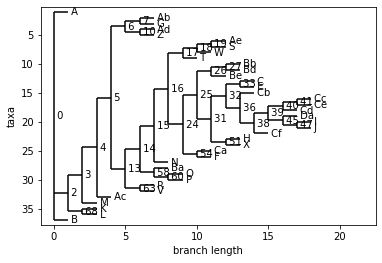

63.322608322608325

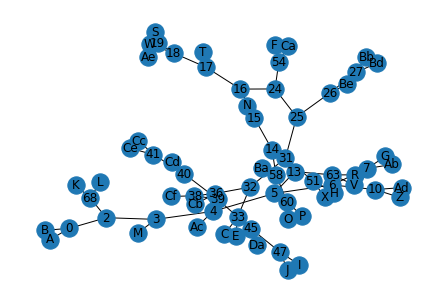

In [84]:
#Same as before
path="C:/Users/Darren Zammit/Desktop/Thesis/datasets/heinrichi"
witnesses = next(walk(path), (None, None, []))[2]
variants=[]
for i in witnesses:
    variants.append(i.replace('.txt',''))
heinnj=tree(f"C:/Users/Darren Zammit/Desktop/Thesis/datasets/nexus/heinrich.out")
Signed_Distance(heinnj,heinrichc.to_undirected(),variants)